In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
df.isnull().sum()/1723*100

age            0.000000
parity         0.000000
hiv            0.232153
menopaus       0.058038
disease        0.000000
surgery        0.000000
conization     0.290192
OPDsize        0.986651
appearance     5.861869
stage          1.392919
pchemo         0.058038
Wardsize       8.415554
finalhisto     0.580383
nodeyiel       0.696460
RHlvsi        21.242020
depth         28.380731
size           6.616367
utmet          5.687754
vgmargin       5.571677
vgmet          5.629716
pelvicme       0.058038
pmmet          5.455601
adnmet         0.406268
dtype: float64

In [6]:
df.isnull().sum(axis=0)


age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [7]:
df_clean_column = df.drop(['size','appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age            0
parity         0
hiv            4
menopaus       1
disease        0
surgery        0
conization     5
OPDsize       17
stage         24
pchemo         1
finalhisto    10
utmet         98
vgmet         97
pmmet         94
dtype: int64

In [8]:
df_clean = df_clean_column.dropna(axis = 0)
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet,pmmet
hn,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,4.0,0.0,3.0,0.0,0.0,0.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [9]:
df_clean.shape


(1571, 14)

In [10]:
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [11]:
pel_class = df_clean['pmmet'].unique()
pel_class

array([0., 1.])

In [12]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1291, 280]

In [13]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1291, 280]

In [14]:
df_clean.groupby('pmmet').count()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet
pmmet,,,,,,,,,,,,,
0.0,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291
1.0,280,280,280,280,280,280,280,280,280,280,280,280,280


In [15]:
y = df_clean['pmmet'].values
X = df_clean.drop(['pmmet'],axis = 1).values

In [16]:
X.shape

(1571, 13)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [19]:
np.min(X_train_norm,axis= 0 )

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
np.max(X_train_norm,axis= 0 )

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
np.max(X_test_norm,axis= 0 ) 

array([0.79365079, 0.76923077, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.77777778, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1,10,100,1000]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1}
10CV accuracy : 81.37079365079366


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 87.61904761904762


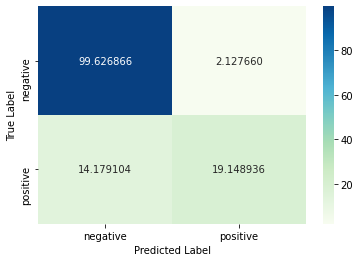

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [34]:
100 * sum (y_test == y_predict) / len(y_test)

87.61904761904762

# 